### Cargar set de datos

Importart `numpy` y `pandas`

Cargar `./data/drings.csv`

Mostrar el head.

In [398]:
import numpy as np
import pandas as pd

In [399]:
df = pd.read_csv('./data/drinks.csv')
df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


### Explorar la función `melt` y sus parámetros

Parámetros:
- `value_vars`
- `id_vars`
- `var_name`

In [400]:
df2 = df.melt(value_vars=['beer_servings', 'spirit_servings', 'wine_servings'])
df2 = df.melt(id_vars=['country', 'continent'], value_vars=['beer_servings', 'spirit_servings', 'wine_servings'])
df2 = df.melt(id_vars=['country', 'continent'], value_vars=['beer_servings', 'spirit_servings', 'wine_servings'], var_name='servings')
df2['servings'] = df2['servings'].map({'beer_servings':'beer','spirit_servings':'spirint', 'wine_servings':'wine'})
df2.head()

,country,continent,servings,value
0,Afghanistan,AS,beer,0
1,Albania,EU,beer,89
2,Algeria,AF,beer,25
3,Andorra,EU,beer,245
4,Angola,AF,beer,217


### Explorar la función `groupby` y sus parámetros

Parámetros:
- `by`
- `as_index`

Agrupar las bebidas por continente y calcular, la media y el desvío standard.
Colocar ambos valores calculados en un único DF.

#### Versión 1

Columnas:
- `beer_mean`
- `spirit_mean`
- `wine_mean`
- `beer_std`
- `spirit_std`
- `wine_std`

ID:
- `continent`

In [ ]:
dfg = df.drop(columns='country').groupby('continent', as_index=False)
dfg = df.groupby('continent', as_index=False)[['beer_servings', 'spirit_servings', 'wine_servings']]
df_mean = dfg.mean()
df_mean = df_mean.rename(columns={
    'beer_servings'   : 'beer_mean',
    'spirit_servings' : 'spirit_mean',
    'wine_servings'   : 'wine_mean',
})
# df_mean = df.groupby('continent', as_index=True)[['beer_servings', 'spirit_servings', 'wine_servings']].mean()
# df_mean = df_mean.reset_index()
df_mean.head()

In [ ]:
df_std = dfg.std()
df_std = df_std.rename(columns={
    'beer_servings'   : 'beer_std',
    'spirit_servings' : 'spirit_std',
    'wine_servings'   : 'wine_std',
})
df_std.head()

In [ ]:
df4 = pd.concat([df_mean, df_std], axis=1)
df4.head()

#### Versión 2

Columnas:
- `mean`
- `std`

ID:
- `continent`
- `drink`

In [ ]:
df_mean_b = df_mean.rename(columns={'beer_mean':'beer', 'spirit_mean':'spirit', 'wine_mean':'wine'})
df_mean_b = df_mean_b.melt(id_vars=['continent'], value_vars=['beer', 'spirit', 'wine'], var_name='drink')
df_mean_b = df_mean_b.rename(columns={'value':'mean'})
df_mean_b.head()

In [ ]:
df_std_b = df_std.rename(columns={'beer_std':'beer', 'spirit_std':'spirit', 'wine_std':'wine'})
df_std_b = df_std_b.melt(id_vars=['continent'], value_vars=['beer', 'spirit', 'wine'], var_name='drink')
df_std_b = df_std_b.rename(columns={'value':'std'})
df_std_b.head()

In [ ]:
df5 = pd.concat([df_mean_b, df_std_b['std']], axis=1)
df5.head()

### Graficar el promedio en cada continente y 

<Axes: xlabel='continent', ylabel='mean'>

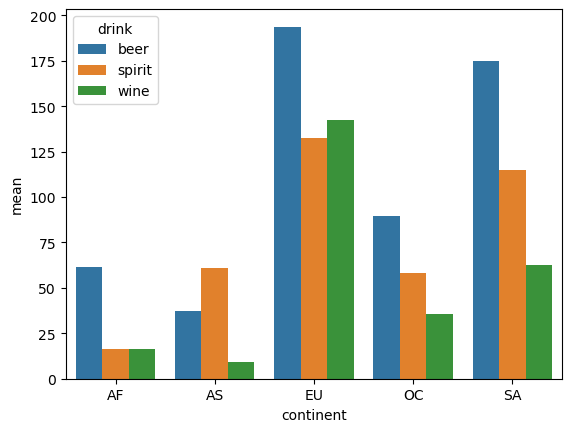

In [402]:
import seaborn as sns
sns.barplot(data=df5, x='continent', y='mean', hue='drink')

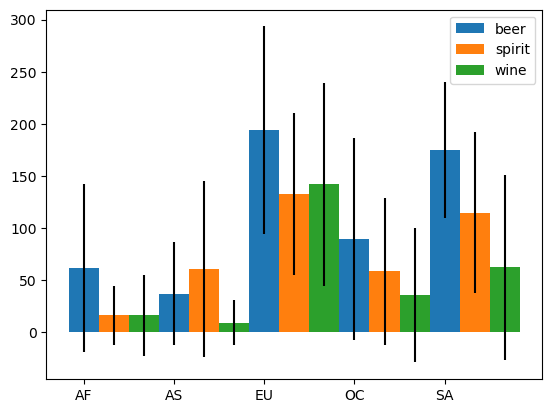

In [403]:
import matplotlib.pyplot as plt
drinks = ('beer', 'spirit', 'wine',)
width = 1./len(drinks)
for i,drink in enumerate(drinks):
    mask = df5['drink'] == drink
    y = np.array(df5[mask]['mean'])
    sd = np.array(df5[mask]['std'])
    x = np.arange(len(y)) + i * width
    plt.bar(x, y, width=width, yerr=sd)

c = np.unique(np.array(df5[mask]['continent']))
x = np.arange(len(c))
plt.xticks(x, labels=c)
plt.legend(drinks)
plt.show()

In [404]:
# df['continent'] = df['continent'].fillna('NaC')
df6 = df.melt(id_vars=['country', 'continent'], value_vars=['beer_servings', 'spirit_servings', 'wine_servings'], var_name='drink')
df6['drink'] = df6['drink'].map({'beer_servings':'beer', 'spirit_servings':'spirit', 'wine_servings':'wine'})
df6.head(n=10)

,country,continent,drink,value
0,Afghanistan,AS,beer,0
1,Albania,EU,beer,89
2,Algeria,AF,beer,25
3,Andorra,EU,beer,245
4,Angola,AF,beer,217
5,Antigua & Barbuda,NaN,beer,102
6,Argentina,SA,beer,193
7,Armenia,EU,beer,21
8,Australia,OC,beer,261
9,Austria,EU,beer,279


<Axes: xlabel='continent', ylabel='value'>

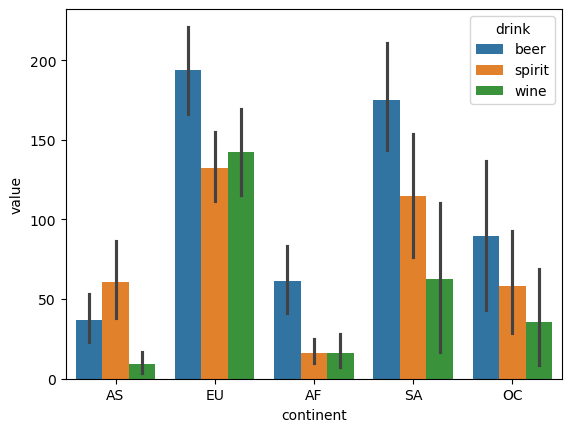

In [405]:
sns.barplot(data=df6, x='continent', y='value', hue='drink')

### Ejemplo con multilpes aggregations

In [ ]:
aux = dfg.agg([np.mean, np.std])
aux.head()

In [ ]:
columns = ['_'.join(a) for a in aux.columns]
print(columns)
aux.columns = columns
aux.head()

In [ ]:
dfg['beer_servings'].agg({'Mean':np.mean, 'Std':np.std})

### Ejemplo de pivot

In [ ]:
df6.head()
df6.pivot(index=['country', 'drink'], columns='continent', values='value').head(n=10)

# Más ejemplos con Seaborn

In [459]:
df6['continent'] = df6['continent'].fillna('NaC')
df6.head(10)

,country,continent,drink,value
0,Afghanistan,AS,beer,0
1,Albania,EU,beer,89
2,Algeria,AF,beer,25
3,Andorra,EU,beer,245
4,Angola,AF,beer,217
5,Antigua & Barbuda,NaC,beer,102
6,Argentina,SA,beer,193
7,Armenia,EU,beer,21
8,Australia,OC,beer,261
9,Austria,EU,beer,279


<Axes: xlabel='value', ylabel='Density'>

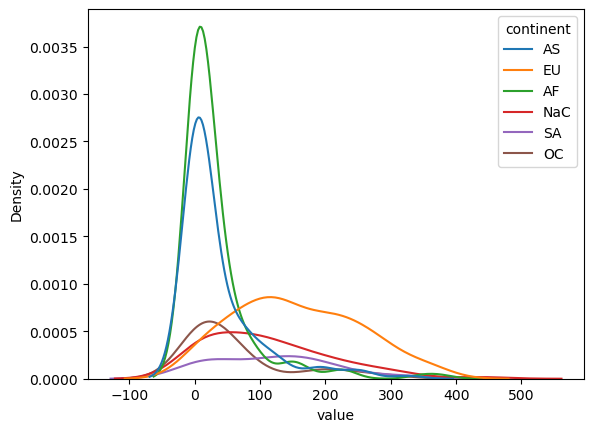

In [460]:
sns.kdeplot(data=df6, x='value', hue='continent')

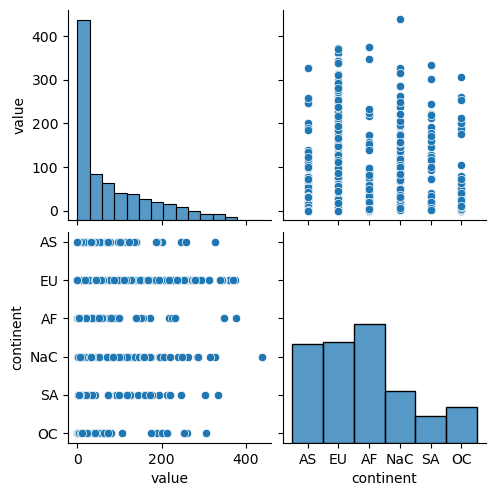

In [461]:
sns.pairplot(data=df6, y_vars=['value', 'continent'], x_vars=['value', 'continent'])

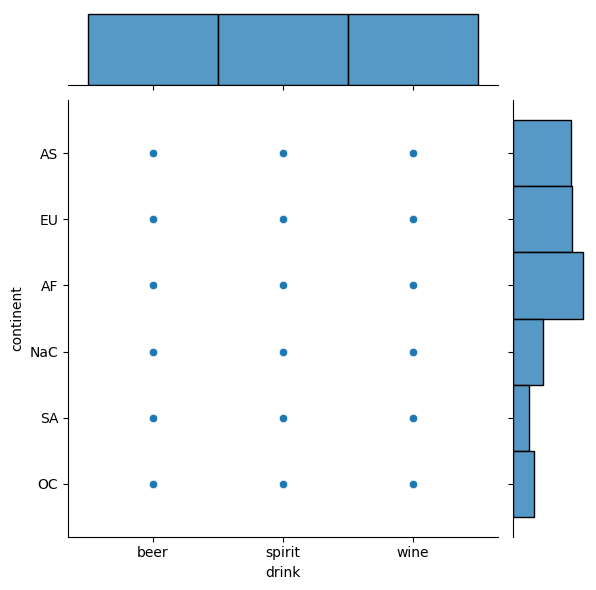

In [462]:
sns.jointplot(data=df6, x='drink', y='continent')

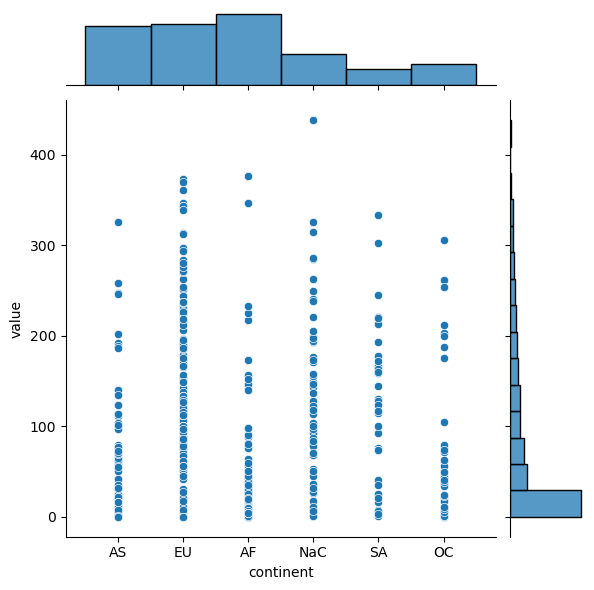

In [463]:
sns.jointplot(data=df6, x='continent', y='value')

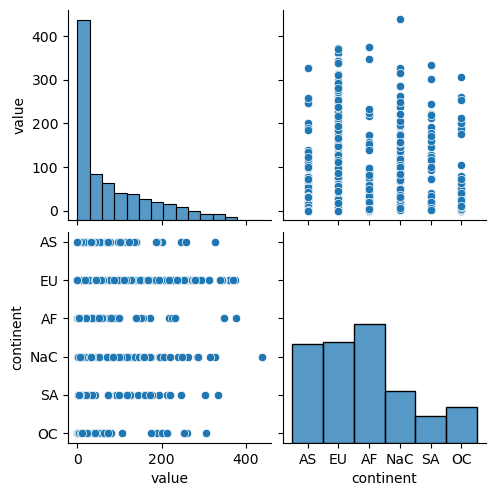

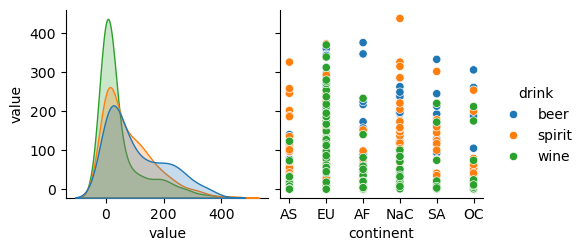

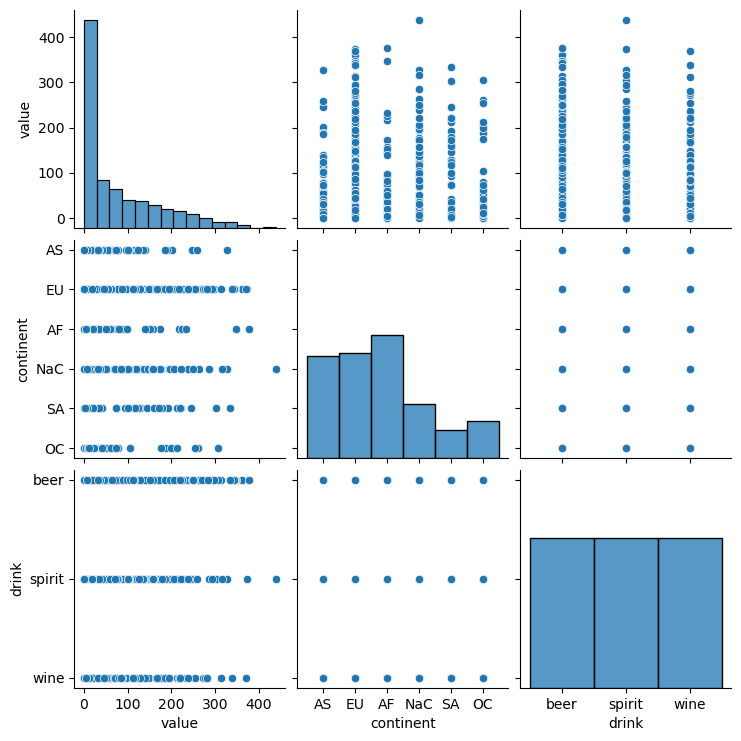

In [464]:
sns.pairplot(data=df6, vars=['value', 'continent'])
sns.pairplot(data=df6, x_vars=['value', 'continent'], y_vars='value', hue='drink')
sns.pairplot(data=df6, vars=['value', 'continent', 'drink'])

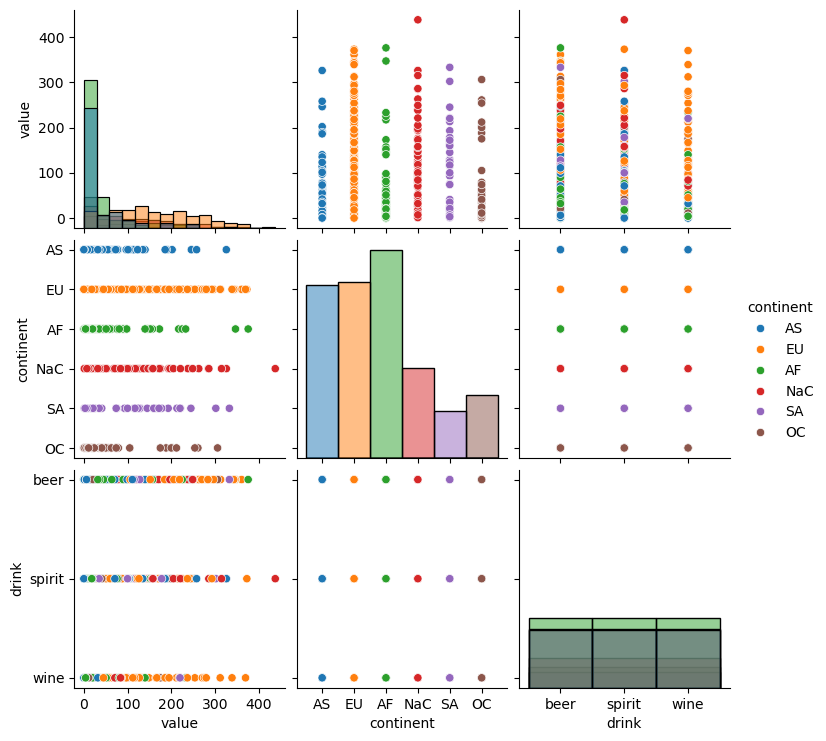

In [469]:
sns.pairplot(data=df6, vars=['value', 'continent', 'drink'], hue='continent', diag_kind='hist')

In [473]:
df7 = df6.copy()
df7['drink'] = df7['drink'].map({'beer':0, 'spirit':1, 'wine':2})
df7.head(1)

,country,continent,drink,value
0,Afghanistan,AS,0,0
